# Dinamic stochastic models in Python

## Forecasting non-observables

1. Load libraries

In [53]:
import sys
sys.path.append('Libraries')
import DSGE_LinearMethods as DLM
import DSGE_PreProcessing as DPP
import HandleTimeSeries as HTS
import sympy as sp
sp.init_session(use_latex=True)

IPython console for SymPy 1.12 (Python 3.12.4-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.12/



* Check Libraries below are actually needed

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

1. Procesing and solving the model

In [55]:
Mod = DPP.process_file3('SimpleSE4.txt')
from CC_Y0_filled4 import f1
CCvals, Y0 = f1()
Mod = DLM.SolveModel(Mod, CCvals, Y0, True)


-> Stability conditions met

Steady state
           User supplied  Numerical
y               0.000000   0.000000
Ds              0.000000   0.000000
Dp              1.980263   1.980263
Dpm             1.980263   1.980263
ys              0.000000   0.000000
Dps             1.980263   1.980263
Ey              0.000000   0.000000
l4ͰEyͰ1p        0.000000   0.000000
l3ͰEyͰ1p        0.000000   0.000000
l2ͰEyͰ1p        0.000000   0.000000
q               0.000000   0.000000
EDp             1.980263   1.980263
EDs             0.000000   0.000000
i               3.469124   3.469124
resAR_y         0.000000   0.000000
resAR_Dp        0.000000   0.000000
resAR_i         0.000000   0.000000
resAR_x         0.000000   0.000000
Eys             0.000000   0.000000
EDps            1.980263   1.980263
iis             2.975296   2.975296
resAR_ys        0.000000   0.000000
resAR_Dps       0.000000   0.000000
resAR_is        0.000000   0.000000
phi             0.000000   0.000000
DQ              0.0000

3. Generation of fictional data

In [56]:
Thorizon = 80
dateend = '2024Q4'
DBH = DLM.simulateDSGE(Mod,Thorizon,dateend)

* Keeping just observable variables

In [57]:
Yobs = Mod['StateSpaceForm']['obs_names']
varobsnames = DLM.sympy_to_list(Yobs)
DBobs = DBH[varobsnames]

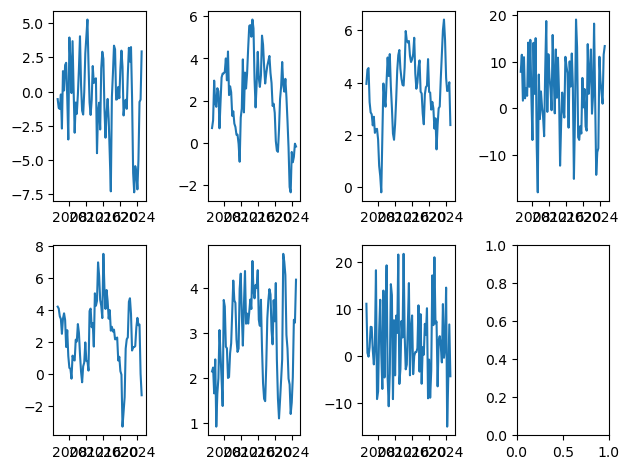

In [58]:
fig, axs = plt.subplots(2,4)
axs[0,0].plot(DBobs.index, DBobs["Ds"], linestyle='-')
axs[0,1].plot(DBobs.index, DBobs["Dp"],  linestyle='-')
axs[0,2].plot(DBobs.index, DBobs["i"],  linestyle='-')
axs[0,3].plot(DBobs.index, DBobs["DY"],  linestyle='-')
axs[1,0].plot(DBobs.index, DBobs["Dps"], linestyle='-')
axs[1,1].plot(DBobs.index, DBobs["iis"], linestyle='-')
axs[1,2].plot(DBobs.index, DBobs["DYs"],  linestyle='-')

plt.tight_layout()
plt.show()

In [59]:
DF_s, DF_u, minuslogL = DLM.KFts(DBobs, Mod, {'diffuse':False})

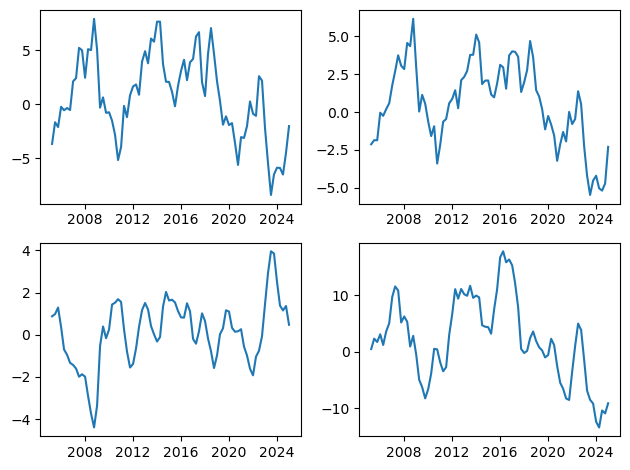

In [60]:
fig, axs = plt.subplots(2,2)
axs[0,0].plot(DF_s.index, DF_s["y"], linestyle='-')   #marker adds circles to points
axs[0,1].plot(DF_s.index, DF_s["Ey"], linestyle='-')  #marker adds circles to points
axs[1,0].plot(DF_s.index, DF_s["phi"], linestyle='-') #marker adds circles to points
axs[1,1].plot(DF_s.index, DF_s["q"], linestyle='-')   #marker adds circles to points
plt.tight_layout()
plt.show()

In [61]:
Data = DF_s
Data

,y,Ds,Dp,Dpm,ys,Dps,Ey,l4ͰEyͰ1p,l3ͰEyͰ1p,l2ͰEyͰ1p,...,resAR_is,phi,DQ,l1ͰDpͰ4p,l1ͰDpͰ3p,l1ͰDpͰ2p,x,DY,phis,DYs
2005-03-31,-3.695375,-0.551754,0.712337,2.803507,3.344016,4.234287,-2.126420,-2.637799,-2.886631,-2.956659,...,-1.372585,0.877711,2.970196,1.962606,1.768369,1.365289,1.526517,7.837986,-2.034731,11.062896
2005-06-30,-1.683972,-1.206192,1.074058,2.764553,2.636494,4.116407,-1.858552,-2.886631,-2.956659,-2.126420,...,-0.942609,0.983607,1.836157,1.658111,1.483584,1.389528,1.621281,11.485752,-2.453344,0.610051
2005-09-30,-2.129676,-1.273159,2.954176,2.215023,1.726082,3.630454,-1.862548,-2.956659,-2.126420,-1.858552,...,-1.440150,1.292323,-0.596881,1.887854,1.884463,2.149018,2.250015,1.657329,-2.549837,-0.201503
2005-12-31,-0.248019,-0.213615,1.884887,2.831554,1.306509,3.462106,-0.041969,-2.126420,-1.858552,-1.862548,...,-0.082268,0.365947,1.363604,2.493523,2.584798,2.418156,0.701964,10.966769,-2.175849,1.761851
2006-03-31,-0.569771,-2.706340,1.715577,1.598500,1.987097,2.537814,-0.246086,-1.858552,-1.862548,-0.041969,...,-2.243852,-0.699068,-1.884103,2.232794,2.076886,1.656777,0.352214,2.153135,-2.404450,6.162496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,-5.899394,-7.150799,-0.417593,-0.945790,3.025109,3.534029,-4.207322,-4.210210,-5.478989,-4.525557,...,-1.168406,2.514518,-3.199177,1.263167,0.839548,-0.002135,-1.660685,5.937202,-2.702821,14.504738
2024-03-31,-5.923965,-4.997707,-0.902519,-1.166297,-1.611262,3.074394,-5.038997,-5.478989,-4.525557,-4.207322,...,0.191775,1.386618,-1.020794,0.834426,0.251414,-0.365381,-1.397403,3.341858,-2.154226,-15.105344
2024-06-30,-6.531387,-0.759964,-0.649407,1.250941,-3.716591,3.116726,-5.191082,-4.525557,-4.207322,-5.038997,...,1.241249,1.158019,3.006169,0.935697,0.456641,-0.040084,-0.070196,1.010455,-0.501318,-4.981172
2024-09-30,-4.514497,-0.591436,-0.025608,1.290621,-2.911976,0.045617,-4.719930,-4.207322,-5.038997,-5.191082,...,0.788745,1.367062,-0.520210,0.739856,0.371488,0.055908,0.430722,11.507705,0.766100,6.658603


# Forecast

1. Unconditional

In [62]:
FH = 8
FDB = DLM.DSGEforecast0(Mod,Data,FH,'2025Q1')

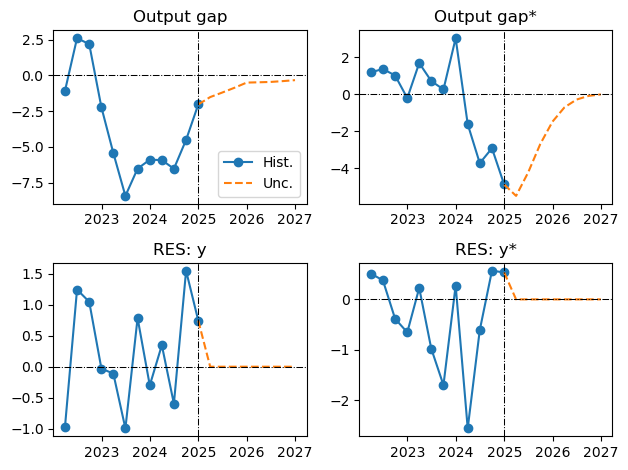

In [63]:
DBdict = {'Unc.': FDB}
lista = ['y','ys','res_y','res_ys']
listanames = ['Output gap','Output gap*','RES: y','RES: y*']
listaSS = [0,0,0,0]
HH = 12
Number_Rows = 2
Number_Cols = 2
fig, axs = HTS.plotTSforecast(DBdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

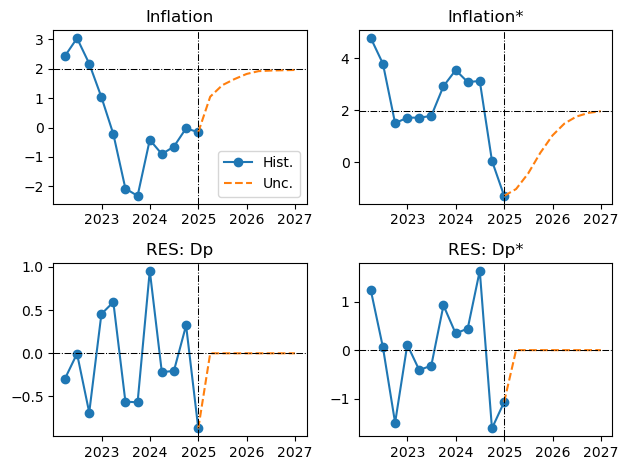

In [64]:
lista = ['Dp','Dps','res_Dp','res_Dps']
listanames = ['Inflation','Inflation*','RES: Dp','RES: Dp*']
listaSS = [100*np.log(1+2.0/100),100*np.log(1+2.0/100),0,0]
fig, axs = HTS.plotTSforecast(DBdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

2. Not anticipated conditional forecast

In [65]:
FH = 8
fechas_fore = HTS.quarterly_dates_from_end('2026Q4', FH)
Cond = dict()
# Unanticipated shocks
res_Dps_f = np.ones(shape=(FH,1))*np.nan
res_Dps_f[0,0] = -0.1
res_Dps_f[2,0] =  0.1
res_ys_f = np.ones(shape=(FH,1))*np.nan
res_ys_f[2,0] = -1.2
res_ys_f[3,0] = -0.6
Cond['UShock'] = pd.DataFrame(np.c_[res_Dps_f,res_ys_f], columns=['res_Dps','res_ys'], index=fechas_fore)
# Unanticipated endogeous (hardtuning)
Dp_f = np.ones(shape=(FH,1))*np.nan
Dp_f[4,0] = 2.1
Dp_f[5,0] = 2.0
y_f = np.ones(shape=(FH,1))*np.nan
y_f[5,0] = 1.5
y_f[6,0] = 0.75
Cond['Uvar'] = dict()
Cond['Uvar']['var']   = pd.DataFrame(np.c_[Dp_f,y_f], columns=['Dp','y'], index=fechas_fore)
Cond['Uvar']['shock'] = ['res_Dp','res_y']

Cond['Uvar']['var']

,Dp,y
2025-03-31,NaN,NaN
2025-06-30,NaN,NaN
2025-09-30,NaN,NaN
2025-12-31,NaN,NaN
2026-03-31,2.1,NaN
2026-06-30,2.0,1.50
2026-09-30,NaN,0.75
2026-12-31,NaN,NaN


In [66]:
UFDB = DLM.DSGEforecast0(Mod,Data,FH,'2025Q1',Cond)

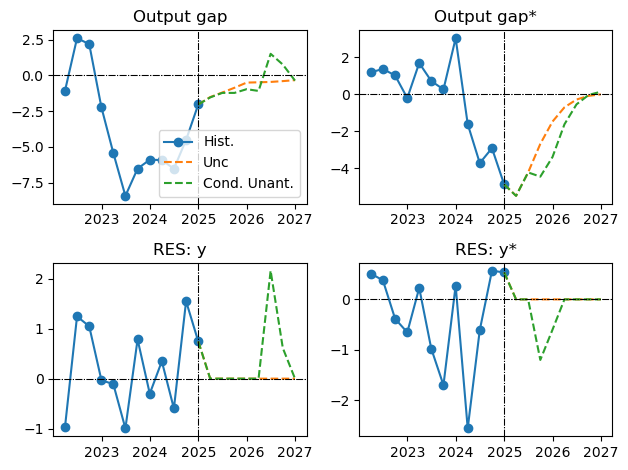

In [67]:
BDdict = {'Unc': FDB,'Cond. Unant.': UFDB}
lista = ['y','ys','res_y','res_ys']
listanames = ['Output gap','Output gap*','RES: y','RES: y*']
listaSS = [0,0,0,0]
HH = 12
Number_Rows = 2
Number_Cols = 2
fig, axs = HTS.plotTSforecast(BDdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

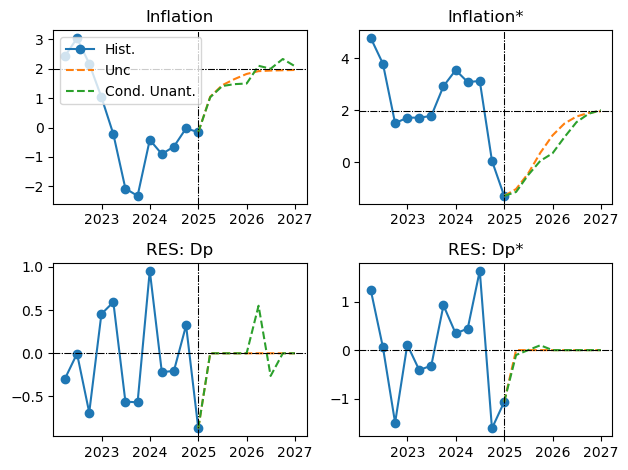

In [68]:
lista = ['Dp','Dps','res_Dp','res_Dps']
listanames = ['Inflation','Inflation*','RES: Dp','RES: Dp*']
listaSS = [100*np.log(1+2.0/100),100*np.log(1+2.0/100),0,0]
fig, axs = HTS.plotTSforecast(BDdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

In [69]:
UFDB['Dp_uh'] = Cond['Uvar']['var']['Dp']
UFDB[['Dp','Dp_uh']].tail(10)

,Dp,Dp_uh
2024-09-30,-0.025608,NaN
2024-12-31,-0.160320,NaN
2025-03-31,1.029610,NaN
2025-06-30,1.411779,NaN
2025-09-30,1.476235,NaN
2025-12-31,1.497325,NaN
2026-03-31,2.100000,2.1
2026-06-30,2.000000,2.0
2026-09-30,2.331844,NaN
2026-12-31,2.083976,NaN


3. Anticipated shocks

In [70]:
FH = 8
fechas_fore = HTS.quarterly_dates_from_end('2026Q4', FH)
Cond = dict()
# Unanticipated shocks
res_Dps_f = np.ones(shape=(FH,1))*np.nan
res_Dps_f[0,0] = -0.1
res_Dps_f[2,0] =  0.1
res_ys_f = np.ones(shape=(FH,1))*np.nan
res_ys_f[2,0] = -1.2
res_ys_f[3,0] = -0.6
Cond['AShock'] = pd.DataFrame(np.c_[res_Dps_f,res_ys_f], columns=['res_Dps','res_ys'], index=fechas_fore)
# Unanticipated endogeous (hardtuning)
Dp_f = np.ones(shape=(FH,1))*np.nan
Dp_f[4,0] = 2.1
Dp_f[5,0] = 2.0
y_f = np.ones(shape=(FH,1))*np.nan
y_f[5,0] = 1.5
y_f[6,0] = 0.75
Cond['Avar'] = dict()
Cond['Avar']['var']   = pd.DataFrame(np.c_[Dp_f,y_f], columns=['Dp','y'], index=fechas_fore)
Cond['Avar']['shock'] = ['res_Dp','res_y']

Cond['Avar']['var']

,Dp,y
2025-03-31,NaN,NaN
2025-06-30,NaN,NaN
2025-09-30,NaN,NaN
2025-12-31,NaN,NaN
2026-03-31,2.1,NaN
2026-06-30,2.0,1.50
2026-09-30,NaN,0.75
2026-12-31,NaN,NaN


In [71]:
AFDB = DLM.DSGEforecast0(Mod,Data,FH,'2025Q1',Cond)

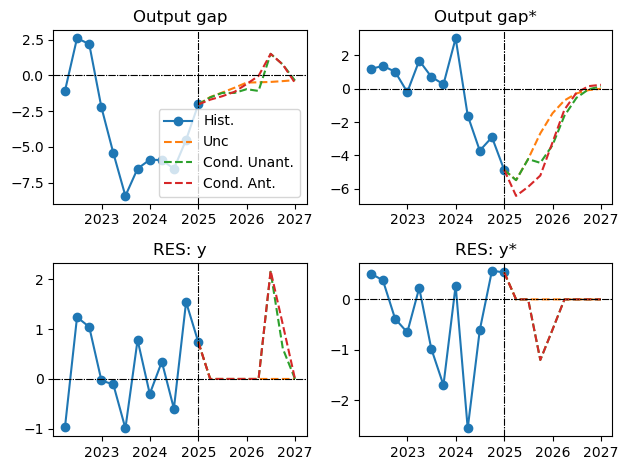

In [72]:
BDdict = {'Unc': FDB,'Cond. Unant.': UFDB,'Cond. Ant.': AFDB}
lista = ['y','ys','res_y','res_ys']
listanames = ['Output gap','Output gap*','RES: y','RES: y*']
listaSS = [0,0,0,0]
HH = 12
Number_Rows = 2
Number_Cols = 2
fig, axs = HTS.plotTSforecast(BDdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

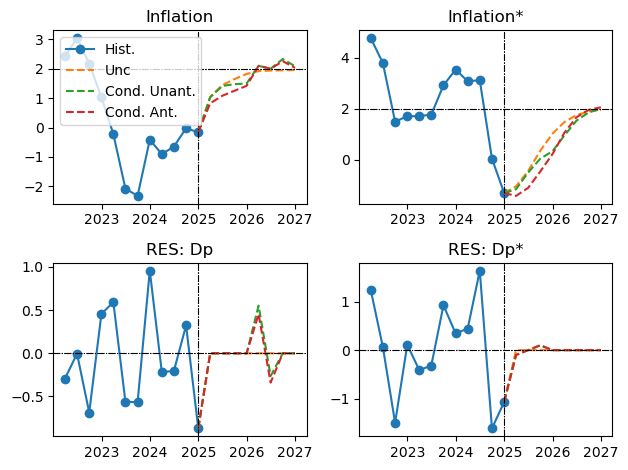

In [73]:
lista = ['Dp','Dps','res_Dp','res_Dps']
listanames = ['Inflation','Inflation*','RES: Dp','RES: Dp*']
listaSS = [100*np.log(1+2.0/100),100*np.log(1+2.0/100),0,0]
fig, axs = HTS.plotTSforecast(BDdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

In [74]:
AFDB['Dp_uh'] = Cond['Avar']['var']['Dp']
AFDB[['Dp','Dp_uh']].tail(10)

,Dp,Dp_uh
2024-09-30,-0.025608,NaN
2024-12-31,-0.160320,NaN
2025-03-31,0.825509,NaN
2025-06-30,1.079620,NaN
2025-09-30,1.251313,NaN
2025-12-31,1.419859,NaN
2026-03-31,2.100000,2.1
2026-06-30,2.000000,2.0
2026-09-30,2.256708,NaN
2026-12-31,2.031663,NaN


4. Anticipated and ununticipated shocks

In [75]:
del Cond
FH = 8
fechas_fore = HTS.quarterly_dates_from_end('2026Q4', FH)
Cond = dict()
# Anticipated shocks
res_Dps_f = np.ones(shape=(FH,1))*np.nan
res_Dps_f[0,0] = -0.1
res_Dps_f[2,0] =  0.1
Cond['AShock'] = pd.DataFrame(np.c_[res_Dps_f], columns=['res_Dps'], index=fechas_fore)
# Anticipated endogeous (hardtuning)
y_f = np.ones(shape=(FH,1))*np.nan
y_f[5,0] = 1.5
y_f[6,0] = 0.75
Cond['Avar'] = dict()
Cond['Avar']['var']   = pd.DataFrame(np.c_[y_f], columns=['y'], index=fechas_fore)
Cond['Avar']['shock'] = ['res_y']
# Unanticipated shocks
res_ys_f = np.ones(shape=(FH,1))*np.nan
res_ys_f[2,0] = -1.2
res_ys_f[3,0] = -0.6
Cond['UShock'] = pd.DataFrame(np.c_[res_ys_f], columns=['res_ys'], index=fechas_fore)
# Unanticipated endogeous (hardtuning)
Dp_f = np.ones(shape=(FH,1))*np.nan
Dp_f[4,0] = 2.1
Dp_f[5,0] = 2.0
Cond['Uvar'] = dict()
Cond['Uvar']['var']   = pd.DataFrame(np.c_[Dp_f], columns=['Dp'], index=fechas_fore)
Cond['Uvar']['shock'] = ['res_Dp']

In [76]:
AUFDB = DLM.DSGEforecast0(Mod,Data,FH,'2025Q1',Cond)

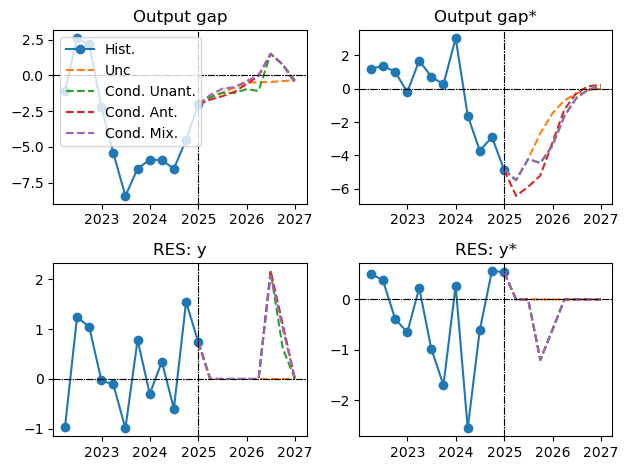

In [77]:
BDdict = {'Unc': FDB,'Cond. Unant.': UFDB,'Cond. Ant.': AFDB,'Cond. Mix.': AUFDB}
lista = ['y','ys','res_y','res_ys']
listanames = ['Output gap','Output gap*','RES: y','RES: y*']
listaSS = [0,0,0,0]
HH = 12
Number_Rows = 2
Number_Cols = 2
fig, axs = HTS.plotTSforecast(BDdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

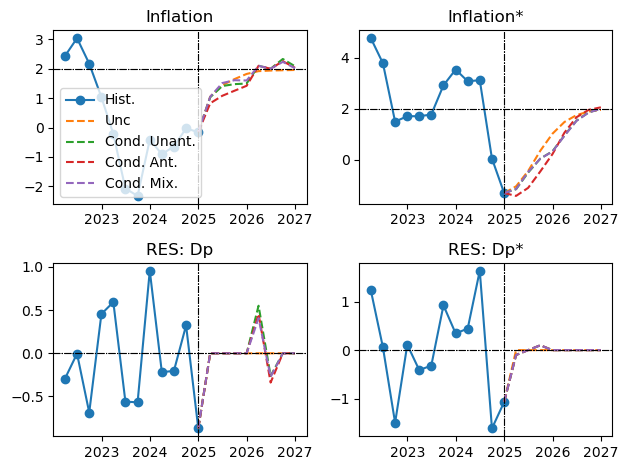

In [78]:
lista = ['Dp','Dps','res_Dp','res_Dps']
listanames = ['Inflation','Inflation*','RES: Dp','RES: Dp*']
listaSS = [100*np.log(1+2.0/100),100*np.log(1+2.0/100),0,0]
fig, axs = HTS.plotTSforecast(BDdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)